*  This program computes 
*    1) the 4 summary statistics
*    2) the geometric means
*    3) some functions of interest
*    4) a test of normality  
*    5) maximum drawdown, etc

In [1]:
import pandas as pd                     # To load data, we use the package pandas
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm                      # We use this package to do estimation
%matplotlib inline

# Load the monthly return of SP500 from 01/1934 to 12/2011

df = pd.read_excel('SP500.xlsx')  
Re = df.loc[:,"Return"]

# Compute the mean and variance

mu = np.mean(Re)
sig = np.var(Re)          # The variance, i.e., the square of the standard deviation
std = np.sqrt(sig)        # The standard deviation
sigma = std

print('(Monthly) Mean,   Std  \n')
print('        {0:.4f}   {1:.4f}\n '.format(mu, std))    

amu = 12*mu
astd = np.sqrt(12)*std
print('(Annualized) Mean,   Std  \n')
print('        {0:.4f}   {1:.4f}\n '.format(amu, astd))   

(Monthly) Mean,   Std  

        0.0095   0.0463
 
(Annualized) Mean,   Std  

        0.1136   0.1605
 


In [2]:
# Compute the Sharpe Ratio

df2 = pd.read_excel('Riskfree.xlsx') 
Rate = df2.loc[:,"rate"]

ER = Re - Rate/100          # the excess return, i.e., return minus riskfree rate
                              #  divided by 100 b/c the rate data is in percentage points
mu2 = np.mean(ER)
sig2 = np.var(ER)          # The variance, i.e., the square of the standard deviation
std2 = np.sqrt(sig)        # The standard deviation

Sharpe = mu2/std2

print('The monthly and annulaized Sharpe ratios \n')
print('          {0:.2f}   {1:.2f}  \n'.format(Sharpe, np.sqrt(12)*Sharpe)) 

The monthly and annulaized Sharpe ratios 

          0.14   0.48  



In [3]:
# Data for Problem II 

df1 = pd.read_excel('SP500.xlsx')
df2 = pd.read_excel('Riskfree.xlsx')
df3 = pd.read_excel('IBM.xlsx')

period1_sp500 = df1[(df1["Date"] >= 19340101) & (df1["Date"] <= 20061231)].reset_index()
period2_sp500 = df1[(df1["Date"] >= 20070101) & (df1["Date"] <= 20111231)].reset_index()

period1_riskfree = df2[(df2["Date"] >= 20070101) & (df2["Date"] <= 20111231)].reset_index()
period2_riskfree = df2[(df2["Date"] >= 20070101) & (df2["Date"] <= 20111231)].reset_index()

period1_ibm = df3[(df3["Date"] >= 19340101) & (df3["Date"] <= 20061231)].reset_index()
period2_ibm = df3[(df3["Date"] >= 20070101) & (df3["Date"] <= 20111231)].reset_index()

In [4]:
# 1)  What are the average monthly return and risk (sample mean and sample standard deviation) for each of the two assets?
print("Q1:")

sp500_mean1 = np.mean(period1_sp500["Return"])
sp500_mean2 = np.mean(period2_sp500["Return"])

print("Average monthly return of S&P500 of period 1: {0:.4f}".format(sp500_mean1))
print("Average monthly return of S&P500 of period 2: {0:.4f}".format(sp500_mean2))
print()

sp500_std1 = np.std(period1_sp500["Return"])
sp500_std2 = np.std(period2_sp500["Return"])

print("Average monthly risk of S&P500 of period 1: {0:.4f}".format(sp500_std1))
print("Average monthly risk of S&P500 of period 2: {0:.4f}".format(sp500_std2))
print()

ibm_mean1 = np.mean(period1_ibm["Return"])
ibm_mean2 = np.mean(period2_ibm["Return"])

print("Average monthly return of IBM of period 1: {0:.4f}".format(ibm_mean1))
print("Average monthly return of IBM of period 2: {0:.4f}".format(ibm_mean2))
print()

ibm_std1 = np.std(period1_ibm["Return"])
ibm_std2 = np.std(period2_ibm["Return"])

print("Average monthly risk of IBM of period 1: {0:.4f}".format(ibm_std1))
print("Average monthly risk of IBM of period 2: {0:.4f}".format(ibm_std2))
print()

Q1:
Average monthly return of S&P500 of period 1: 0.0100
Average monthly return of S&P500 of period 2: 0.0014

Average monthly risk of S&P500 of period 1: 0.0457
Average monthly risk of S&P500 of period 2: 0.0538

Average monthly return of IBM of period 1: 0.0128
Average monthly return of IBM of period 2: 0.0138

Average monthly risk of IBM of period 1: 0.0657
Average monthly risk of IBM of period 2: 0.0563



In [5]:
# 2)  What is the reward per unit of risk (excess mean/std, known as Sharpe Ratio)?
print("Q2:")

rate = df2.loc[:,"rate"]

sp_ER1 = period1_sp500["Return"] - rate/100
sp_mu1 = np.mean(sp_ER1)
sp_std1 = np.std(sp_ER1)
sp_sharpe1 = sp_mu1/sp_std1
print("Sharpe ratio of period 1 for S&P500: {0:.4f}".format(sp_sharpe1))
print()

sp_ER2 = period2_sp500["Return"] - rate/100
sp_mu2 = np.mean(sp_ER2)
sp_std2 = np.std(sp_ER2)
sp_sharpe2 = sp_mu2/sp_std2
print("Sharpe ratio of period 2 for S&P500: {0:.4f}".format(sp_sharpe2))
print()


ibm_ER1 = period1_ibm["Return"] - rate/100
ibm_mu1 = np.mean(ibm_ER1)
ibm_std1 = np.std(ibm_ER1)
ibm_sharpe1 = ibm_mu1/ibm_std1
print("Sharpe ratio of period 1 for IBM: {0:.4f}".format(ibm_sharpe1))
print()

ibm_ER2 = period2_ibm["Return"] - rate/100
ibm_mu2 = np.mean(ibm_ER2)
ibm_std2 = np.std(ibm_ER2)
ibm_sharpe2 = ibm_mu2/ibm_std2
print("Sharpe ratio of period 2 for IBM: {0:.4f}".format(ibm_sharpe2))
print()


Q2:
Sharpe ratio of period 1 for S&P500: 0.1493

Sharpe ratio of period 2 for S&P500: 0.0245

Sharpe ratio of period 1 for IBM: 0.1461

Sharpe ratio of period 2 for IBM: 0.2431



In [6]:
# 3) Which of the equity assets has a higher Sharpe Ratio ?
print("Q3:")

if ibm_sharpe1 + ibm_sharpe2 > sp_sharpe1 + sp_sharpe2:
    print("The Sharpe ratio of IBM is higher than S&P500.")
else:
    print("The Sharpe ratio of SP500 is higher than IBM.")

print()

Q3:
The Sharpe ratio of IBM is higher than S&P500.



In [7]:
# 4)  If you invest $1,000 in IBM and S&P500 in January 2007, respectively,  what will be your wealth if you hold it to the end of the period?
print("Q4:")

sp500_value = 1000
len_period2_sp500 = len(period2_sp500)
for i in range(len_period2_sp500):
    sp500_value = sp500_value * (1 + period2_sp500["Return"][i])

print("Wealth if 1000$ invested in S&P500 January 2007: {0:.2f}$".format(sp500_value))
print()

ibm_value = 1000
len_period2_ibm = len(period2_ibm)
for i in range(len_period2_ibm):
    ibm_value = ibm_value * (1 + period2_ibm["Return"][i])

print("Wealth if 1000$ invested IBM in January 2007: {0:.2f}$".format(ibm_value))
print()

Q4:
Wealth if 1000$ invested in S&P500 January 2007: 998.07$

Wealth if 1000$ invested IBM in January 2007: 2065.71$



In [8]:
# 5) What are the skewness and kurtosis of IBM and S&P500?
print("Q5:")
print()

# Compute the skewness and kurtosis of "IBM"

ibm_re = df3.loc[:,"Return"]    # Get the return of IBM

ibm_skew = ss.skew(ibm_re)
ibm_kurt = 3 + ss.kurtosis(ibm_re) # Add 3 because code subtracts it
print("IBM:")
print('\n  skew,    kurt by using scipy.stats \n')
print('  {0:.4f}    {1:.4f}\n '.format(ibm_skew, ibm_kurt))

print()

# Compute the skewness and kurtosis of "S&P500"

sp_re = df1.loc[:,"Return"]    # Get the return of S&P500

sp_skew = ss.skew(Re)
sp_kurt = 3 + ss.kurtosis(Re) # Add 3 because code subtracts it
print("S&P500:")
print('\n  skew,     kurt by using scipy.stats \n')
print('  {0:.4f}    {1:.4f}\n '.format(sp_skew, sp_kurt))

Q5:

IBM:

  skew,    kurt by using scipy.stats 

  0.2342    5.1142
 

S&P500:

  skew,     kurt by using scipy.stats 

  -0.4551    6.3448
 


(array([  3.,   1.,  10.,  66., 276., 432., 132.,  13.,   2.,   1.]),
 array([-2.54460e-01, -2.03592e-01, -1.52724e-01, -1.01856e-01,
        -5.09880e-02, -1.20000e-04,  5.07480e-02,  1.01616e-01,
         1.52484e-01,  2.03352e-01,  2.54220e-01]),
 <BarContainer object of 10 artists>)

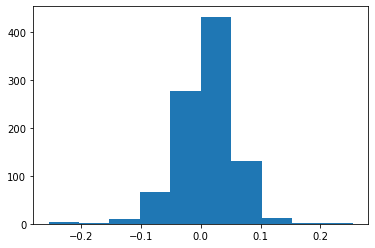

In [9]:
# 6) Is S&P500 closer to the normality assumption ?
plt.hist(df1["Return"])

### Ans (6): Yes S&P500 is closer to the normality assumption because the histogram is somehow bell shaped.

In [ ]:
# Compute the skewness and kurtosis

skew=0;                  # initialize it be zero
kurt=0;

T = len(df)             # Get the length, # of obvs (the headers of the Excel doesn't count)

for i in range(T):
    skew=skew + pow(Re[i]-mu,3)          # sums the 3rd power terms successively
    kurt=kurt + pow(Re[i]-mu,4)

skew=( skew / pow(sigma,3) ) / T               # take the average
kurt=( kurt / pow(sigma,4) ) / T 

print('(Monthly) skew,   kurt \n')
print('        {0:.4f}   {1:.4f}\n '.format(skew, kurt))    

# Use scipy.stats package as an alternative 

skew2 = ss.skew(Re)
kurt2 = ss.kurtosis(Re)
print('\n  skew,   kurt by using scipy.stats \n')
print('        {0:.4f}   {1:.4f}\n '.format(skew, kurt))    

# Use scipy.stats package to get unbiased estimates   
#  like standard deviation, deviding by T-1 is unbiased. 
#    but here dividing some other numbers, not T-1, to make them unbiased

skew3 = ss.skew(Re,bias=False)
kurt3 = 3 + ss.kurtosis(Re,bias=False)    # add 3 bc the code substracts it.
print('\n  skew,   kurt by using scipy.stats \n')
print('        {0:.4f}   {1:.4f}\n '.format(skew3, kurt3)) 


In [ ]:
# Compute the 95% confidence for the skewness and kurtosis
#   Note first the 95% interval of the normal is [-1.96, 1.96],
#     which can be computed by:   x=norminv([0.025 0.975],0,1)
    
skewA=-1.96*np.sqrt(6/T)
skewB=1.96*np.sqrt(6/T)
 
kurtA=-1.96*np.sqrt(24/T)+3
kurtB=1.96*np.sqrt(24/T)+3

print(' Confidence interval for skew  \n')
print('        {0:.4f}   {1:.4f}\n '.format(skewA, skewB))
print(' Confidence interval for kurt \n')
print('        {0:.4f}   {1:.4f}\n '.format(kurtA, kurtB))    

#
print(' Recall the estimated skew,   kurt \n')
print('        {0:.4f}   {1:.4f}\n '.format(skew, kurt))    


In [ ]:
# Compute the wealth (accu return) and geometric mean 

Value = 1

for i in range(T):
    Value = Value * (1 + Re[i])

gmu=pow(Value, 1/T) - 1 


print('The accumulative returns \n')
print('          {0:.2f}\n'.format(Value))   

print('The sample mean and geometric mean  \n')
print('        {0:.4f}   {1:.4f}\n '.format(mu, gmu))    

In [ ]:
# Q1:  Percentage of up returns?
     
Up = 0

for j in range(T): 
    if Re[j]>0:
        Up = Up+1

UpPer = Up/T

print('The percentage of up months \n')
print('          {0:.2f} \n'.format(UpPer)) 

In [ ]:
# Q2: What is the accumulative return if we miss 5% of the best returns ?
# Assuming earning the average riskfree rate of 4%/12 in those missing months                        
                        
ReturnS = sorted(Re)    # Sort the returns in increasing order

T1 = .05 * T             #  5% of the sample
T1 = round(T1)           # Round the number to an integer

Value1 = 1

for i in range(T-T1):
    Value1 = Value1 * (1 + ReturnS[i])

for i in range(T-T1, T):
    Value1 = Value1 * (1 + 0.04/12)

print('Q2: The accumulative return if we miss 5% of the best months? \n')
print('          {0:.2f}\n'.format(Value1))

In [ ]:
# Q3: What is the max drawdown, the largest % drop from a previous peak

       #Note:  We just copy and paste the algorithm (see the zip file) and take its validity
           # for granted, as in most cases in practice for well established theories or formulas.
       # Since the algorithm requires prices as input, we translate the
       # returns into prices first (the starting price can be set as 100)
 
P = 100*np.ones((T,1))     # initial values

MDD = 0
Worst = 0
             # using the algorithm in the file
max = -99
Worst = np.amin(Re)         # the minimum of an array, the return here

Ptemp = 100                # need a temp to execute P[j+1]=P[j]*(1+Re[j]), so that
                             # P[j+1] is stored as P[j], to avoid index out of range in Python

for j in range(T): 
    Ptemp=Ptemp*(1+Re[j])        # convert to prices;
    P[j]=Ptemp   
    if P[j]>max:
        max=P[j]
    DD=100*(max-P[j]) / max
    if DD>MDD:
        MDD=DD
        
MDD = MDD / 100             # in percentage 
print(MDD)

In [ ]:
# Simulate T normal random varables with the same mean and varance  

e = np.random.randn(T,1)     # Generate data from N(0,1), T by 1  

RN = np.ones((T,1))          # create the storage

for i in range(T):           # transform the data so that its mean and variance match the mkt
     RN[i]=mu + sigma*e[i]          # RN = mu*np.ones((T,1)) + sigma*e does the same, but 
                                    # month by month may be easier to understand
 


In [ ]:
# plot the returns and simulated returns

p=plt.plot(Re)
p1 = plt.plot(RN)

In [ ]:
# plot the histogram of returns and simulated returns

p=plt.hist(Re)
p1 = plt.hist(RN)

In [ ]:
# plot the index and its 12-month moving-average  
 
df['12MA'] = df['Index'].rolling(window=12,min_periods=0).mean()
                # this will create a column, named as 12MA, from the index by taking the average
                       # of the past 12 month data (including current month)
                # At the firtst to 11 month, impossible to do it. min_periods=0 indicate repplaing them
                   # by using the average of available original data
                
print(df.head())
print(df.tail())

p2= plt.plot(df['Index'])
p3 = plt.plot(df['12MA'])

In [ ]:
# plot a subperiod
 

p2= plt.plot(df.loc[0:100,'Index'], label='SP500 Index')
p3 = plt.plot(df.loc[0:100,'12MA'], label='12 month MA')

plt.xlabel('Month')
plt.ylabel('Index Level')
plt.title('SP500 and \n Its 12-month MA')
plt.legend()
plt.show()
